# Emotional Accountability Score

In [55]:
!pip install textblob
!python -m textblob.download_corpora



Finished.


[nltk_data] Downloading package brown to C:\Users\OM
[nltk_data]     INFOTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\OM
[nltk_data]     INFOTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\OM
[nltk_data]     INFOTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\OM INFOTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\OM
[nltk_data]     INFOTECH\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\OM
[nltk_data]     INFOTECH\AppData\Roaming\nltk_data...
[nltk_

## 🧮 EAS Scoring Formula  

- **Personal pronouns (I, me, my)** → taking ownership  
- **Active vs Passive voice** →  
  - Active: "I made a mistake" ✅  
  - Passive: "Mistakes were made" ❌  
- **Emotional words** (regret, ashamed, embarrassed, devastated)  
- **Deflection words** (if, anyone, but, "mistakes were made")  


In [57]:
import re
from textblob import TextBlob

# Sample apology texts
apologies = [
    # ✅ Excellent Apology (EAS ≥ +5)
    "I am truly sorry for my actions. I deeply regret what I did and I take full responsibility.",
    "I accept full responsibility for my mistake and sincerely apologize for the harm I caused. I will do better.",
    "I acknowledge the pain I’ve caused and I am committed to making amends. I am deeply ashamed and sorry.",
    
    # 🟡 Decent Apology (EAS +2 to +4)
    "I regret the situation and apologize to those affected. It was never my intention to cause harm.",
    "I apologize for the inconvenience. I take some responsibility for what happened.",
    "While I did not mean to upset anyone, I understand how my actions were hurtful and I’m sorry.",
    
    # ⚠️ Weak Apology (EAS 0 to +1)
    "I apologize if anyone felt hurt.",
    "I'm sorry you felt that way.",
    "It wasn’t my intention to cause harm.",
    
    # ❌ Poor Apology (EAS -1 to -3)
    "Mistakes were made. It was an unfortunate event.",
    "I regret how things turned out, but it was out of my hands.",
    "There was a misunderstanding that led to this issue.",
    
    # 🚫 Superficial / Insincere Apology (EAS < -3)
    "We regret the inconvenience caused. It was unintentional and due to external factors.",
    "We are sorry this was perceived negatively. The issue was beyond our control.",
    "Apologies for any offense taken. The situation arose from unforeseen circumstances.",
]

# Keyword categories
ownership_words = [
    "i", "me", "my", "mine", "myself", "we", "our", "ours", "ourselves",
    "take", "took", "taken", "taking", "own", "owned", "owning", "admit", "admitted", "admitting",
    "accept", "accepted", "accepting", "acknowledge", "acknowledged", "acknowledging",
    "responsible", "responsibility", "accountable", "accountability",
    "apologize", "apologized", "apologizing", "confess", "confessed", "confessing",
    "regret", "regretted", "regretting", "realize", "realized", "realizing",
    "recognize", "recognized", "recognizing", "sorry", "repent", "repented", "repenting",
    "truth", "transparency", "candor", "frank", "honest", "humble", "remorseful",
    "concede", "conceded", "conceding", "pledge", "committed", "commitment",
    "correct", "corrected", "correcting", "reform", "reformed", "reforming",
    "amend", "amended", "amending", "make", "made", "making", "response",
    "leadership", "governance", "management", "fault", "blame", "shortcoming",
    "failure", "mistake", "lapse", "flaw", "oversight", "error", "inaccuracy", "breach",
    "negligence", "misjudgment", "responsiveness", "admission", "acceptance"
]

emotional_words = [
    "sorry", "sorrow", "apology", "apologies", "regret", "regrettable",
    "ashamed", "ashamedly", "shame", "remorse", "remorseful", "empathy", "empathetic",
    "heartbroken", "disappointed", "grief", "grieving", "mourning", "pain", "hurt",
    "suffer", "suffering", "sadness", "sad", "grief-stricken", "anguish",
    "distress", "anguished", "guilt", "guilty", "penitence", "penitent", "tears", "weep",
    "cry", "cried", "crying", "emotional", "emotions", "devastated", "devastating",
    "compassion", "sympathy", "fear", "concern", "concerned", "care", "careful",
    "broken", "wrecked", "torn", "destroyed", "regretting", "vulnerable",
    "touched", "apologetic", "devastation", "depressed", "crushed", "lament",
    "forgiveness", "forgive", "forgiven", "humble", "humility", "low", "defeated",
    "upset", "heartfelt", "deeply", "intensely", "emotionally", "touched", "saddened",
    "wounded", "wound", "anguish", "rue", "repent", "repented", "grievance",
    "resent", "torment", "burdened", "melancholy", "apologizing", "empathetically",
    "gloom", "apologize", "compassionate", "misery", "apology"
]

deflection_words = [
    "if", "but", "however", "yet", "although", "though", "unintentional", "unexpected",
    "allegedly", "accused", "unaware", "incident", "situation", "circumstances",
    "mistakes were made", "oversight", "beyond our control", "unforeseen",
    "external", "misunderstanding", "confusion", "miscommunication",
    "unintended", "unknown", "inadvertent", "unclear", "assumed", "assumption",
    "nobody", "someone", "somebody", "team", "staff", "employees", "individual",
    "not our intention", "never meant", "apparent", "potentially", "may have",
    "possibly", "could", "might", "should have", "would have", "due to", "as a result of",
    "because of", "unfortunately", "we regret to inform", "perception", "claims",
    "reported", "reportedly", "feedback", "we were informed", "it appears",
    "not responsible", "we didn’t know", "information was lacking",
    "beyond expectations", "error occurred", "due process", "technical issue",
    "process failure", "process breakdown", "delays", "resource issue", "third-party",
    "contractor", "vendor", "suppliers", "weather", "system error", "external factor",
    "regret the impact", "public concern", "we understand the concern",
    "sensitive topic", "we understand how it might be viewed",
    "perceived", "appears", "interpreted", "no intent", "legal matter",
    "internal matter", "being reviewed", "investigation ongoing"
]

# Apology analyzer
def analyze_apology(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    lower_text = text.lower()
    text_length = len(lower_text.split())

    # Count exact matches using regex for accurate scoring
    def count_matches(word_list, text):
        return sum(1 for word in word_list if re.search(r'\b' + re.escape(word) + r'\b', text))

    ownership_score = count_matches(ownership_words, lower_text)
    emotion_score = count_matches(emotional_words, lower_text)
    deflection_score = count_matches(deflection_words, lower_text)

    # Weighted EAS calculation with higher deflection penalty
    raw_eas = (2 * ownership_score + 2 * emotion_score - 3 * deflection_score)
    normalized_eas = round((raw_eas / text_length) * 10, 2) if text_length > 0 else 0
    capped_eas = max(-10, min(10, normalized_eas))

    # Adjusted polarity influenced by EAS
    adjusted_polarity = round(polarity + 0.05 * capped_eas, 2)

    # Interpretation by EAS
    if capped_eas >= 7:
        interpretation = "High accountability"
    elif capped_eas >= 4:
        interpretation = "Medium accountability"
    elif capped_eas >= 1:
        interpretation = "Low accountability"
    else:
        interpretation = "Deflective / No accountability"

    # Final sentiment logic
    if capped_eas >= 5:
        sentiment = "Positive"
    elif 2 <= capped_eas < 5:
        sentiment = "Weak Positive" if adjusted_polarity > 0 else "Neutral"
    elif 0 <= capped_eas < 2:
        sentiment = "Neutral" if adjusted_polarity >= 0 else "Negative"
    elif -3 <= capped_eas < 0:
        sentiment = "Negative"
    else:
        sentiment = "Negative"

    return {
        "text": text,
        "sentiment": sentiment,
        "polarity": adjusted_polarity,
        "EAS": capped_eas,
        "interpretation": interpretation
    }

# Run and print results
results = [analyze_apology(text) for text in apologies]

for res in results:
    print("📌 Apology:", res["text"])
    print("   ➤ Sentiment:", res["sentiment"], "(Polarity:", res["polarity"], ")")
    print("   ➤ EAS (Emotional Accountability Score):", res["EAS"])
    print("   ➤ Interpretation:", res["interpretation"])
    print()

📌 Apology: I am truly sorry for my actions. I deeply regret what I did and I take full responsibility.
   ➤ Sentiment: Positive (Polarity: 0.45 )
   ➤ EAS (Emotional Accountability Score): 10
   ➤ Interpretation: High accountability

📌 Apology: I accept full responsibility for my mistake and sincerely apologize for the harm I caused. I will do better.
   ➤ Sentiment: Positive (Polarity: 0.82 )
   ➤ EAS (Emotional Accountability Score): 7.37
   ➤ Interpretation: High accountability

📌 Apology: I acknowledge the pain I’ve caused and I am committed to making amends. I am deeply ashamed and sorry.
   ➤ Sentiment: Positive (Polarity: 0.22 )
   ➤ EAS (Emotional Accountability Score): 9.47
   ➤ Interpretation: High accountability

📌 Apology: I regret the situation and apologize to those affected. It was never my intention to cause harm.
   ➤ Sentiment: Positive (Polarity: 0.26 )
   ➤ EAS (Emotional Accountability Score): 5.29
   ➤ Interpretation: Medium accountability

📌 Apology: I apologize 

In [58]:
!pip install wordcloud matplotlib


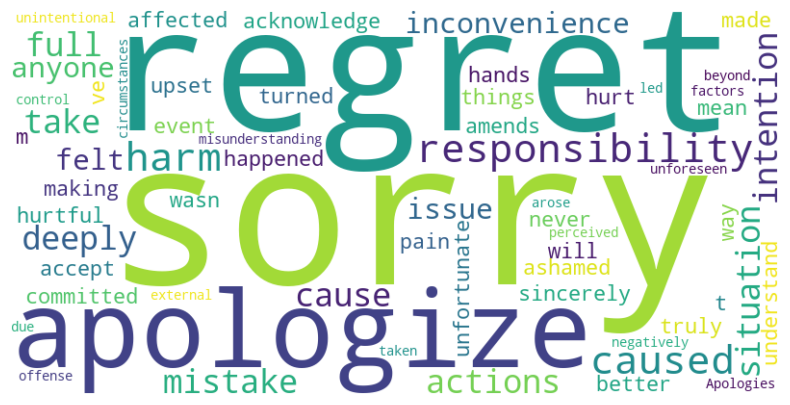

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Apology texts
apologies = [
    "I am truly sorry for my actions. I deeply regret what I did and I take full responsibility.",
    "I accept full responsibility for my mistake and sincerely apologize for the harm I caused. I will do better.",
    "I acknowledge the pain I’ve caused and I am committed to making amends. I am deeply ashamed and sorry.",
    "I regret the situation and apologize to those affected. It was never my intention to cause harm.",
    "I apologize for the inconvenience. I take some responsibility for what happened.",
    "While I did not mean to upset anyone, I understand how my actions were hurtful and I’m sorry.",
    "I apologize if anyone felt hurt.",
    "I'm sorry you felt that way.",
    "It wasn’t my intention to cause harm.",
    "Mistakes were made. It was an unfortunate event.",
    "I regret how things turned out, but it was out of my hands.",
    "There was a misunderstanding that led to this issue.",
    "We regret the inconvenience caused. It was unintentional and due to external factors.",
    "We are sorry this was perceived negatively. The issue was beyond our control.",
    "Apologies for any offense taken. The situation arose from unforeseen circumstances.",
]

# Combine all apology texts
all_text = " ".join(apologies)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


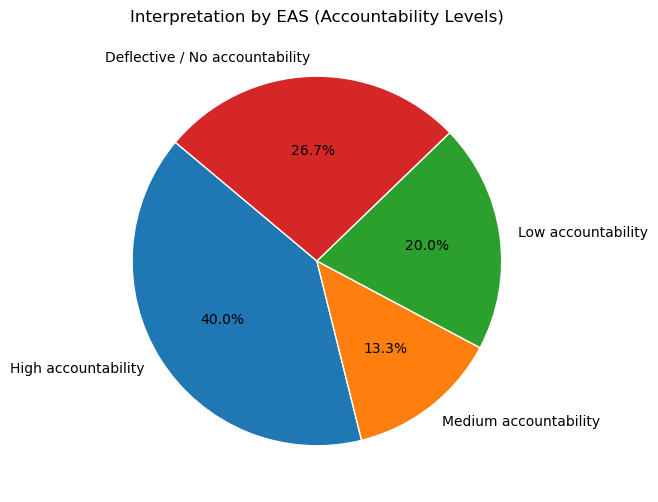

In [60]:
import matplotlib.pyplot as plt
from collections import Counter

# Analyze all apologies
results = [analyze_apology(text) for text in apologies]

# Collect interpretation and sentiment counts
interpretations = [res["interpretation"] for res in results]
sentiments = [res["sentiment"] for res in results]

interpretation_counts = Counter(interpretations)
sentiment_counts = Counter(sentiments)

# ---- PIE CHART (Interpretation by EAS) ----
plt.figure(figsize=(6,6))
plt.pie(
    interpretation_counts.values(),
    labels=interpretation_counts.keys(),
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Interpretation by EAS (Accountability Levels)")
plt.show()



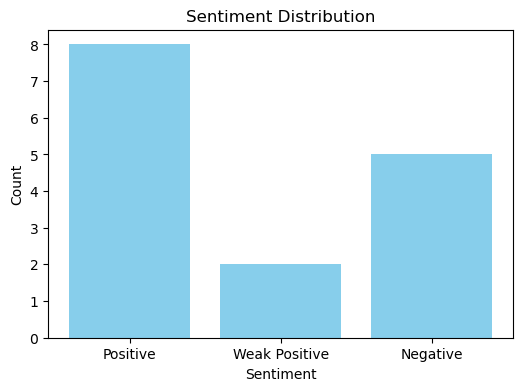

In [61]:
# ---- BAR CHART (Sentiment) ----
plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color='skyblue')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
